#  scraping app info and reviews from Google Play

## import libraries

In [137]:
import pandas as pd

from google_play_scraper import app, Sort, reviews,reviews_all

import play_scraper

import matplotlib.pyplot as plt

import csv

from wordcloud import WordCloud, STOPWORDS

from bidi.algorithm import get_display 

import advertools as adv

import datetime as dt



## get apps ids 

In [139]:
# Our app ids from google play

app_ids = {'instagram':'com.instagram.android',
       'TikTok':'com.zhiliaoapp.musically',
       'tinder':'com.tinder',
       'waze':'com.waze'}


# colum of interest to view for app data

cols_of_interest = ['title', 'summary','minInstalls',
             'ratings','genre','reviews','score',
             'free','released','editorsChoice',
            'similarApps']

# CSV for project

app_comparison_csv = 'app_comparison.csv'

reviews_csv = 'reviews.csv'

## gets app info

In [140]:
app_info = []

for id in app_ids:
    info = app(app_ids[id])
    app_info.append(info)   

## make dataframe and csv file 

In [141]:
info_df = pd.DataFrame(app_info)


info_df = info_df[cols_of_interest]

info_df = pd.DataFrame(info_df).to_csv(app_comparison_csv, encoding="utf8")


In [142]:
pd.read_csv(app_comparison_csv)

,Unnamed: 0,title,summary,minInstalls,ratings,genre,reviews,score,free,released,editorsChoice,similarApps
0,0,Instagram,"Create & share photos, stories, & clips with t...",1000000000,128912363,Social,4282957,4.112511,True,"Apr 3, 2012",False,"['com.snapchat.android', 'com.whatsapp', 'com...."
1,1,TikTok,Join your friends and discover videos you love...,1000000000,43664560,Social,1745872,4.528929,True,"Jul 9, 2015",False,"['video.like', 'com.snapchat.android', 'com.in..."
2,2,Tinder - Dating & Make Friends,"App to Match, Chat & Date with New People - on...",100000000,4489521,Lifestyle,227879,3.045296,True,"Jul 15, 2013",False,"['com.bumble.app', 'com.ftw_and_co.happn', 'co..."
3,3,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",Save time on every drive. Waze tells you about...,100000000,8447718,Maps & Navigation,625157,4.436002,True,NaN,False,"['com.microsoft.office.outlook', 'com.ubercab'..."


# Data Visualization 

### Installations By App millions

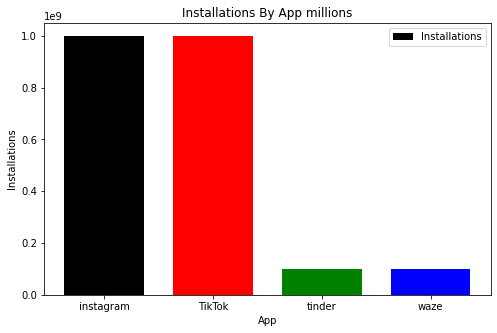

In [143]:
x = []
y = []

plt.figure(figsize=(8,5))  
with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',') 
    next(plots, None)
    for row in plots:
        y.append(int(float(row[3])))
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Installations')
plt.xlabel('App')
plt.ylabel('Installations')
plt.title('Installations By App millions')
plt.legend()
plt.show()

### Avarage Rating By App 

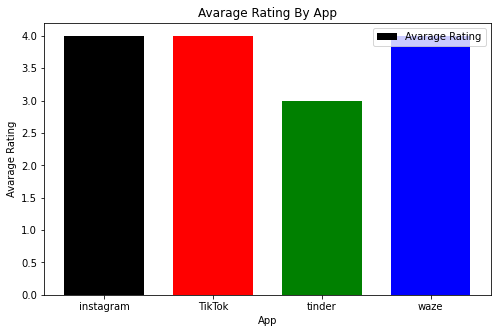

In [144]:

x = []
y = []

plt.figure(figsize = (8,5))  

with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[7])))
    
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Avarage Rating')
plt.xlabel('App')
plt.ylabel('Avarage Rating')
plt.title('Avarage Rating By App')
plt.legend()
plt.show()

### Avarage Rating By App Category

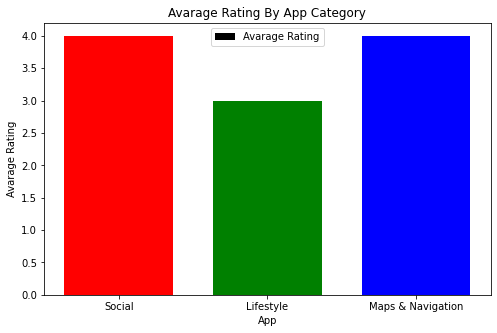

In [145]:
x = []
y = []

plt.figure(figsize=(8,5))  

with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[7])))
        x.append(row[5])

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Avarage Rating')
plt.xlabel('App')
plt.ylabel('Avarage Rating')
plt.title('Avarage Rating By App Category')
plt.legend()
plt.show()

###  Amount Of Reviews By App

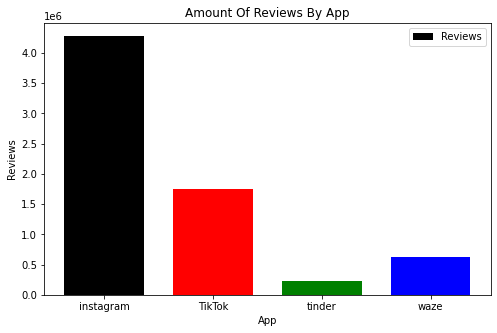

In [146]:
x = []
y = []

plt.figure(figsize=(8,5))  

with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[6])))
    
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Reviews')
plt.xlabel('App')
plt.ylabel('Reviews')
plt.title('Amount Of Reviews By App')
plt.legend()
plt.show()

## get app reviews

In [154]:
# collect reviews for app from google store


result = reviews_all(app_ids.get("tinder"),filter_score_with=1,lang='he',country='li')



## reviews csv

In [166]:
# Fetch a list data
comments = []
for r in result:
    comment = [r['userName'],
               r['content'],
               r['score'],
               r['at']
              ]
    comments.append(comment)

header = ['User Name', 'Review', 'Rate', 'Date']
pd.DataFrame(comments, columns=header).to_csv(reviews_csv)


## create world cloud for review in hebrew 

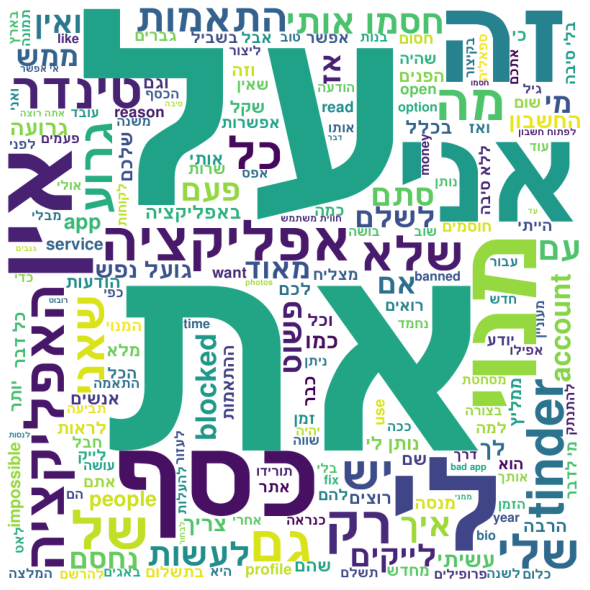

In [175]:
# Python program to generate WordCloud
 

# read csv file
df = pd.read_csv(reviews_csv)


# filter by single year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df[df['Date'].dt.strftime('%Y') == '2021']

comment_words = ''

# remove stopwords in english and hebrew

union_stopwords = set.union(adv.stopwords['hebrew'], adv.stopwords['english'])

stopwords = union_stopwords

# iterate through the csv file
for val in df.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

# use get_display to display hebrew 
comment_words=get_display(comment_words) 

wordcloud = WordCloud(font_path='FreeSansBold.ttf',
                    width = 800, height = 800,
                    background_color ='white',
                    stopwords = union_stopwords,
                    min_font_size = 10,
                    collocations=True).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Fetch a list of autocompleted query suggestion

In [173]:
import play_scraper

print(play_scraper.suggestions('tinder'))

['tinder', 'tinder dating app free download', 'tinder passport', 'tinder free', 'tinder for tennagers 13']


## Fetch a list of applications matching a search query

In [174]:
print(play_scraper.search('tinder', page=2))

[{'app_id': 'com.tinder', 'url': '/store/apps/details?id=com.tinder', 'icon': 'https://play-lh.googleusercontent.com/fDpoqIbZ884ylRnMK8Lx9Fu4DsLQk5yt4f9WkxeOAPpGnzc9BTi_YKkMsLvoMdx7Uzg=s128-rw', 'title': 'Tinder - Dating & Make Friends', 'developer': 'Tinder', 'developer_id': '8070166968320699506', 'description': 'App to Match, Chat & Date with New People - online, near you & around the world!', 'score': None, 'full_price': '0', 'price': '0', 'free': True}, {'app_id': 'com.tinder.tinderlite', 'url': '/store/apps/details?id=com.tinder.tinderlite', 'icon': 'https://play-lh.googleusercontent.com/TcHgSH30vCBCtQfyFLWvvPJdpOAJrSp1OtqopwMue3yRiXa7wT5Fs8gUbA3oJylGW991=s128-rw', 'title': 'Tinder Lite', 'developer': 'Tinder', 'developer_id': '8070166968320699506', 'description': 'Match, Chat & Meet New People', 'score': None, 'full_price': '0', 'price': '0', 'free': True}, {'app_id': 'com.bumble.app', 'url': '/store/apps/details?id=com.bumble.app', 'icon': 'https://play-lh.googleusercontent.com/